# NFW profile and its modifications

In [1]:
import profiley
profiley.__version__

'2.0.0dev2'

In [2]:
%matplotlib inline
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from matplotlib import pyplot as plt
import numpy as np

In [3]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.31, Ob0=0.049, Tcmb0=2.725*u.K)
cosmo

FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.049)

In [4]:
from profiley.nfw import NFW, GNFW, TNFW, Hernquist, WebskyNFW

Let's also make the plots look a little nicer (just comment out if you prefer)

In [5]:
from plottery.plotutils import update_rcParams
update_rcParams()

A few default values

In [6]:
mass = 1e14
concentration = 4
redshift = 0.5
overdensity = 200
background = 'm'

In [7]:
kwargs = dict(cosmo=cosmo, overdensity=overdensity, background=background, frame='comoving')
nfw = NFW(mass, concentration, redshift, **kwargs)
nfw_num = GNFW(mass, concentration, redshift, **kwargs)
gnfw = GNFW(mass, concentration, redshift, alpha=0.5, beta=3, gamma=0.8, **kwargs)
tnfw = TNFW(mass, concentration, redshift, tau=1, eta=1, **kwargs)
hernquist = Hernquist(mass, concentration, redshift, **kwargs)
websky = WebskyNFW(mass, concentration, redshift, alpha=2, **kwargs)

In [10]:
%%time
gnfw.rdelta(500, 'c', rtol=0.01)

CPU times: user 4.66 ms, sys: 2.77 ms, total: 7.42 ms
Wall time: 5.56 ms


array([], dtype=float64)

Let's store this as a dictionary for easy plotting

In [11]:
profiles = {'NFW': nfw, 'NFW (numerical)': nfw_num, 'GNFW': gnfw, 'tNFW': tnfw, 'Hernquist': hernquist, 'WebskyNFW': websky}
profiles = {'NFW': nfw, 'NFW (numerical)': nfw_num, 'GNFW': gnfw, 'tNFW': tnfw, 'WebskyNFW': websky}

Let's take a look at the three-dimensional profiles:

NFW
NFW (numerical)
GNFW
tNFW
WebskyNFW


/home/cristobal/anaconda3/envs/kidsggl/lib/python3.11/site-packages/matplotlib/cbook.py:1699: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


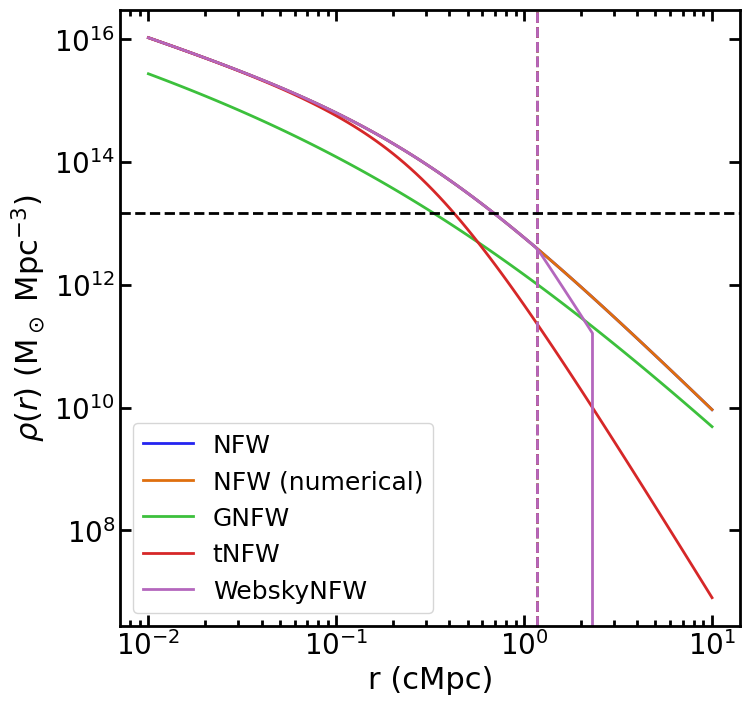

In [12]:
r = np.logspace(-2, 1, 100)

fig, ax = plt.subplots(figsize=(8, 8))
for i, (name, p) in enumerate(profiles.items()):
    color = f'C{i}'
    print(name)
    #print(p, p.profile(r))
    ax.plot(r, p.profile(r)[:,0], color, lw=2, label=name)
    for x in p.radius:
        ax.axvline(x, color=color, ls='--')
ax.axhline(overdensity*rho_bg, ls='--', color='k')
ax.legend()
ax.set(xscale='log', yscale='log',
       xlabel='r (cMpc)', ylabel=r'$\rho(r)$ (M$_\odot$ Mpc$^{-3}$)');

The mean density interior to $r$:

/home/cristobal/anaconda3/envs/kidsggl/lib/python3.11/site-packages/profiley/core.py:467: DeprecationWarning: invalid escape sequence '\g'
  """Cumulative projected profile file excess at projected


ValueError: operands could not be broadcast together with shapes (1000,100) (1000,100,1) 

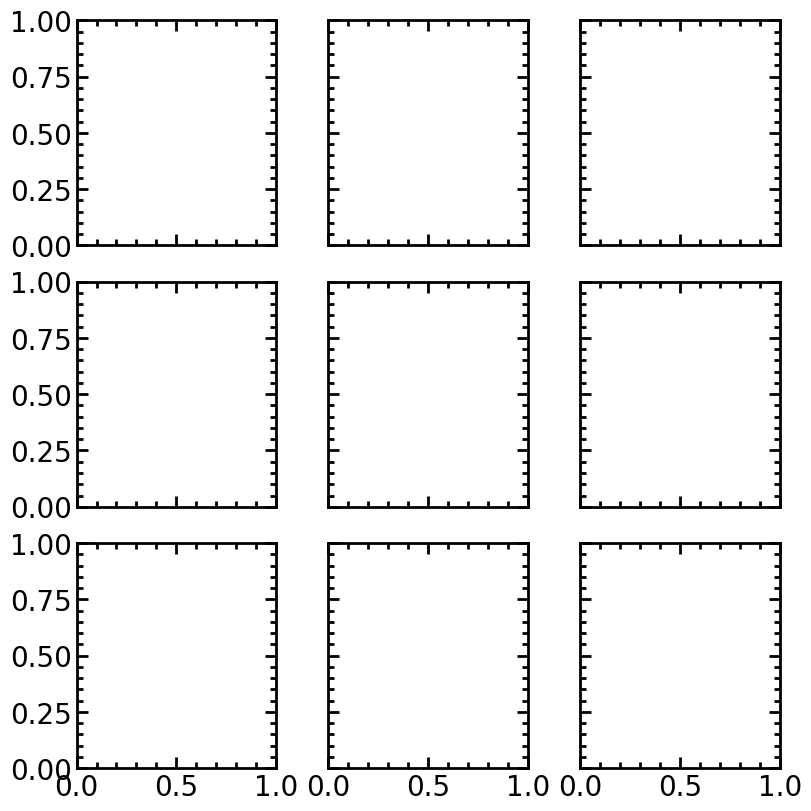

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8), constrained_layout=True, sharex=True, sharey=True)
axes = axes.reshape(-1)
for i, (name, p) in enumerate(profiles.items()):
    ax = axes[i]
    color = f'C{i}'
    ax.plot(r, p.cumulative(r), color, lw=3, label=name, zorder=10-i)
    for x in p.radius:
        ax.axvline(x, color=color, ls='--', lw=2)
    print(name, p.radius, p.density(p.radius), p.cumulative(p.radius), p.cumulative(p.radius)/rho_bg)
    ax.axhline(overdensity*rho_bg, ls='--', color='k')
    #ax.legend()
    ax.set(xscale='log', yscale='log')
           #label='r (cMpc)', ylabel=r'$\bar\rho(r)$ (M$_\odot$ Mpc$^{-3}$)');
    ax.set_title(name, fontsize=12)
for ax in axes[i+1:]:
    ax.axis('off')

Note that all of these are defined with the same $M_{500c}$, so the different shapes will mean different normalizations at specific radii.

What about the surface densities?

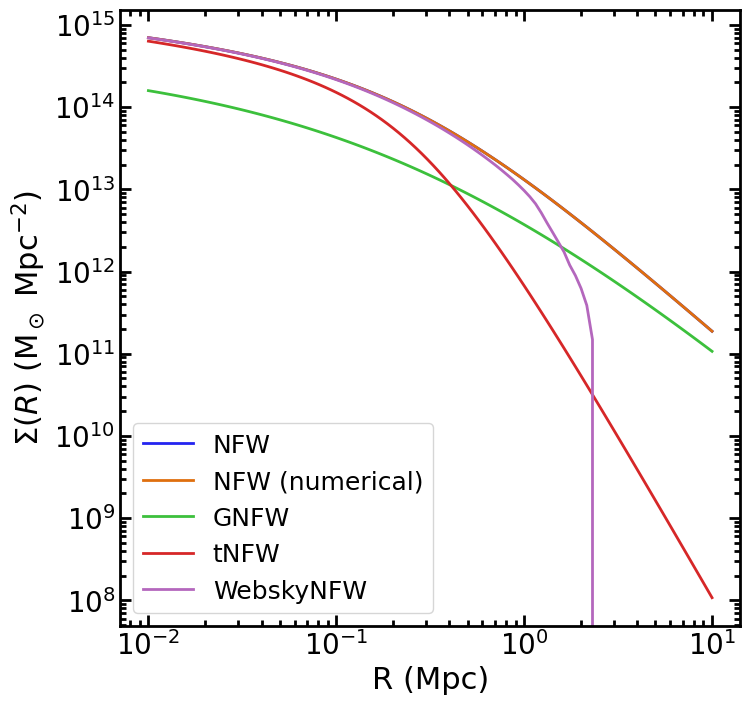

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
for name, p in profiles.items():
    ax.plot(r, p.projected(r), lw=2, label=name)
ax.legend()
ax.set(xscale='log', yscale='log',
       xlabel='R (Mpc)', ylabel=r'$\Sigma(R)$ (M$_\odot$ Mpc$^{-2}$)');

And finally let's see how their weak lensing profiles look:

NFW (100,)
NFW (numerical) (100,)
GNFW (100,)
tNFW (100,)
WebskyNFW (100,)


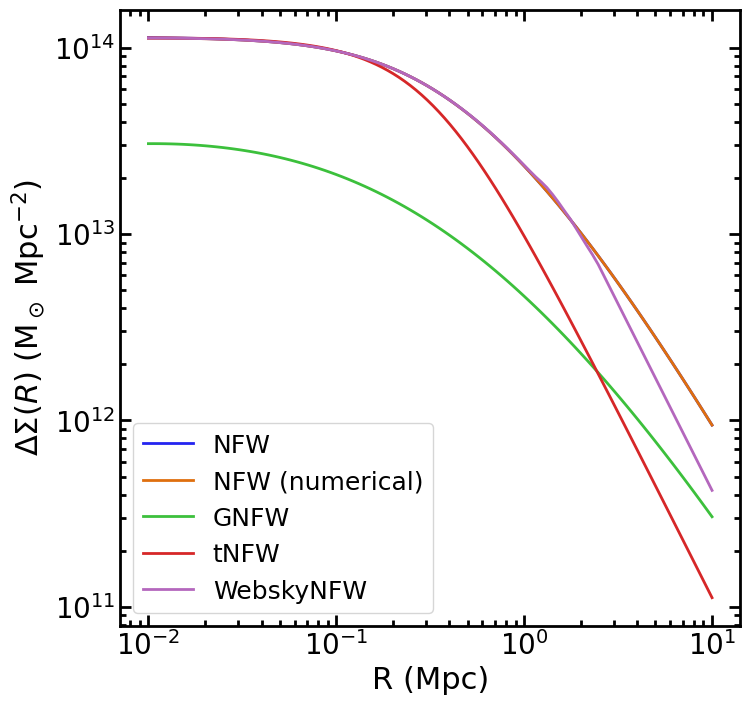

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
for name, p in profiles.items():
    print(name, r.shape)
    ax.plot(r, p.projected_excess(r), lw=2, label=name)
ax.legend()
ax.set(xscale='log', yscale='log',
       xlabel='R (Mpc)', ylabel=r'$\Delta\Sigma(R)$ (M$_\odot$ Mpc$^{-2}$)');

The cumulative mass profiles $M(<r) = 4\pi \int_0^rs^2\rho(s)\,ds$ can be calculated using the `cumulative` method:

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
for i, (name, p) in enumerate(profiles.items()):
    color = f'C{i}'
    ax.plot(r, p.mass_enclosed(r), color=color, lw=2, label=name)
    ax.axvline(p.radius, ls='--', color=color)
ax.axhline(mass, ls='--', color='k')
ax.legend()
ax.set(xscale='log', yscale='log',
       xlabel='r (cMpc)', ylabel=r'$M(<r)$ (M$_\odot$)');

In [ ]:
nfw.enclosed_mass(r).shape

In [ ]:
import numpy as np

# Create a sample multi-dimensional array (shape: (3, 4, 5, 6))
arr = np.random.rand(3, 4, 5, 6)  # Replace this with your multi-dimensional array

# Find the indices of the minimum values along axis=0 for each cell
min_indices_along_axis_0 = np.argmin(arr, axis=0)

# Create index arrays for each axis
index_arrays = np.indices(min_indices_along_axis_0.shape)

# Use the obtained indices to extract corresponding elements from arr
indices_for_extraction = [min_indices_along_axis_0] + list(index_arrays)
corresponding_elements = arr[tuple(indices_for_extraction)]

print(corresponding_elements)


In [ ]:
arr

In [ ]:
min_indices_along_axis_0

In [ ]:
reshaped_indices[0].shape